In [99]:
from sklearn.ensemble import IsolationForest
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns

# Read dataset

In [64]:
df = pd.read_csv('../Dataset/songs_normalize.csv')
df

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Jonas Brothers,Sucker,181026,False,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop
1996,Taylor Swift,Cruel Summer,178426,False,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop
1997,Blanco Brown,The Git Up,200593,False,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984,"hip hop, country"
1998,Sam Smith,Dancing With A Stranger (with Normani),171029,False,2019,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998,pop


# Preprocessing

## Check the missing values

In [66]:
df.isna().sum()

artist              0
song                0
duration_ms         0
explicit            0
year                0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               0
dtype: int64

## Checking datatypes

In [67]:
df.dtypes

artist               object
song                 object
duration_ms           int64
explicit               bool
year                  int64
popularity            int64
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
genre                object
dtype: object

## Remove noise from genre field

In [68]:
unique_features = []
genres = df["genre"].str.strip()
for genre in genres:
    for g in genre.split(','):
        unique_features.append(g.strip())
unique_features = set(unique_features)
unique_features

{'Dance/Electronic',
 'Folk/Acoustic',
 'R&B',
 'World/Traditional',
 'blues',
 'classical',
 'country',
 'easy listening',
 'hip hop',
 'jazz',
 'latin',
 'metal',
 'pop',
 'rock',
 'set()'}

In [69]:
mask = df["genre"].str.contains("set")
df = df[~mask]
df = df.reset_index()
df = df.drop('index', axis=1)
df

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1973,Jonas Brothers,Sucker,181026,False,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop
1974,Taylor Swift,Cruel Summer,178426,False,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop
1975,Blanco Brown,The Git Up,200593,False,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984,"hip hop, country"
1976,Sam Smith,Dancing With A Stranger (with Normani),171029,False,2019,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998,pop


## Convert True/False to 1/0

In [70]:
df = df.astype({"explicit": int})

## Remove duplicate rows

In [71]:
df.drop_duplicates(inplace=True)
df = df.reset_index()
df = df.drop('index', axis=1)
df

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,0,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,0,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,0,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,0,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,0,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1914,Jonas Brothers,Sucker,181026,0,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop
1915,Taylor Swift,Cruel Summer,178426,0,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop
1916,Blanco Brown,The Git Up,200593,0,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984,"hip hop, country"
1917,Sam Smith,Dancing With A Stranger (with Normani),171029,0,2019,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998,pop


## Dataset description

In [72]:
df.describe()

,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,1919.000000,1919.000000,1919.000000,1919.000000,1919.000000,1919.000000,1919.000000,1919.000000,1919.000000,1919.000000,1919.000000,1919.000000,1919.000000,1919.000000,1919.000000
mean,228761.545076,0.278791,2009.523710,59.658155,0.666998,0.721349,5.387181,-5.510079,0.552892,0.104229,0.127565,0.015136,0.181958,0.551702,120.158735
std,39188.660750,0.448521,5.881462,21.573138,0.140733,0.152861,3.607960,1.942778,0.497324,0.096449,0.171947,0.087510,0.141257,0.220776,26.989316
min,113000.000000,0.000000,1998.000000,0.000000,0.129000,0.054900,0.000000,-20.514000,0.000000,0.023200,0.000019,0.000000,0.021500,0.038100,60.019000
25%,203560.000000,0.000000,2004.000000,56.000000,0.581000,0.624000,2.000000,-6.480000,0.000000,0.039900,0.013500,0.000000,0.088600,0.388500,98.985500
50%,223253.000000,0.000000,2010.000000,65.000000,0.676000,0.738000,6.000000,-5.283000,1.000000,0.061200,0.055400,0.000000,0.125000,0.558000,120.022000
75%,248133.000000,1.000000,2015.000000,73.000000,0.764000,0.840000,8.000000,-4.168000,1.000000,0.130000,0.175000,0.000067,0.242000,0.730000,134.332000
max,484146.000000,1.000000,2020.000000,89.000000,0.975000,0.999000,11.000000,-0.276000,1.000000,0.576000,0.976000,0.985000,0.853000,0.973000,210.851000


## Extract nominal-features

In [73]:
nominal_features = ['artist', 'song', 'genre']
cols = list(set(df.columns) - set(nominal_features))
cols_with_genre = cols + ['genre']

## Histogram of features before normalization

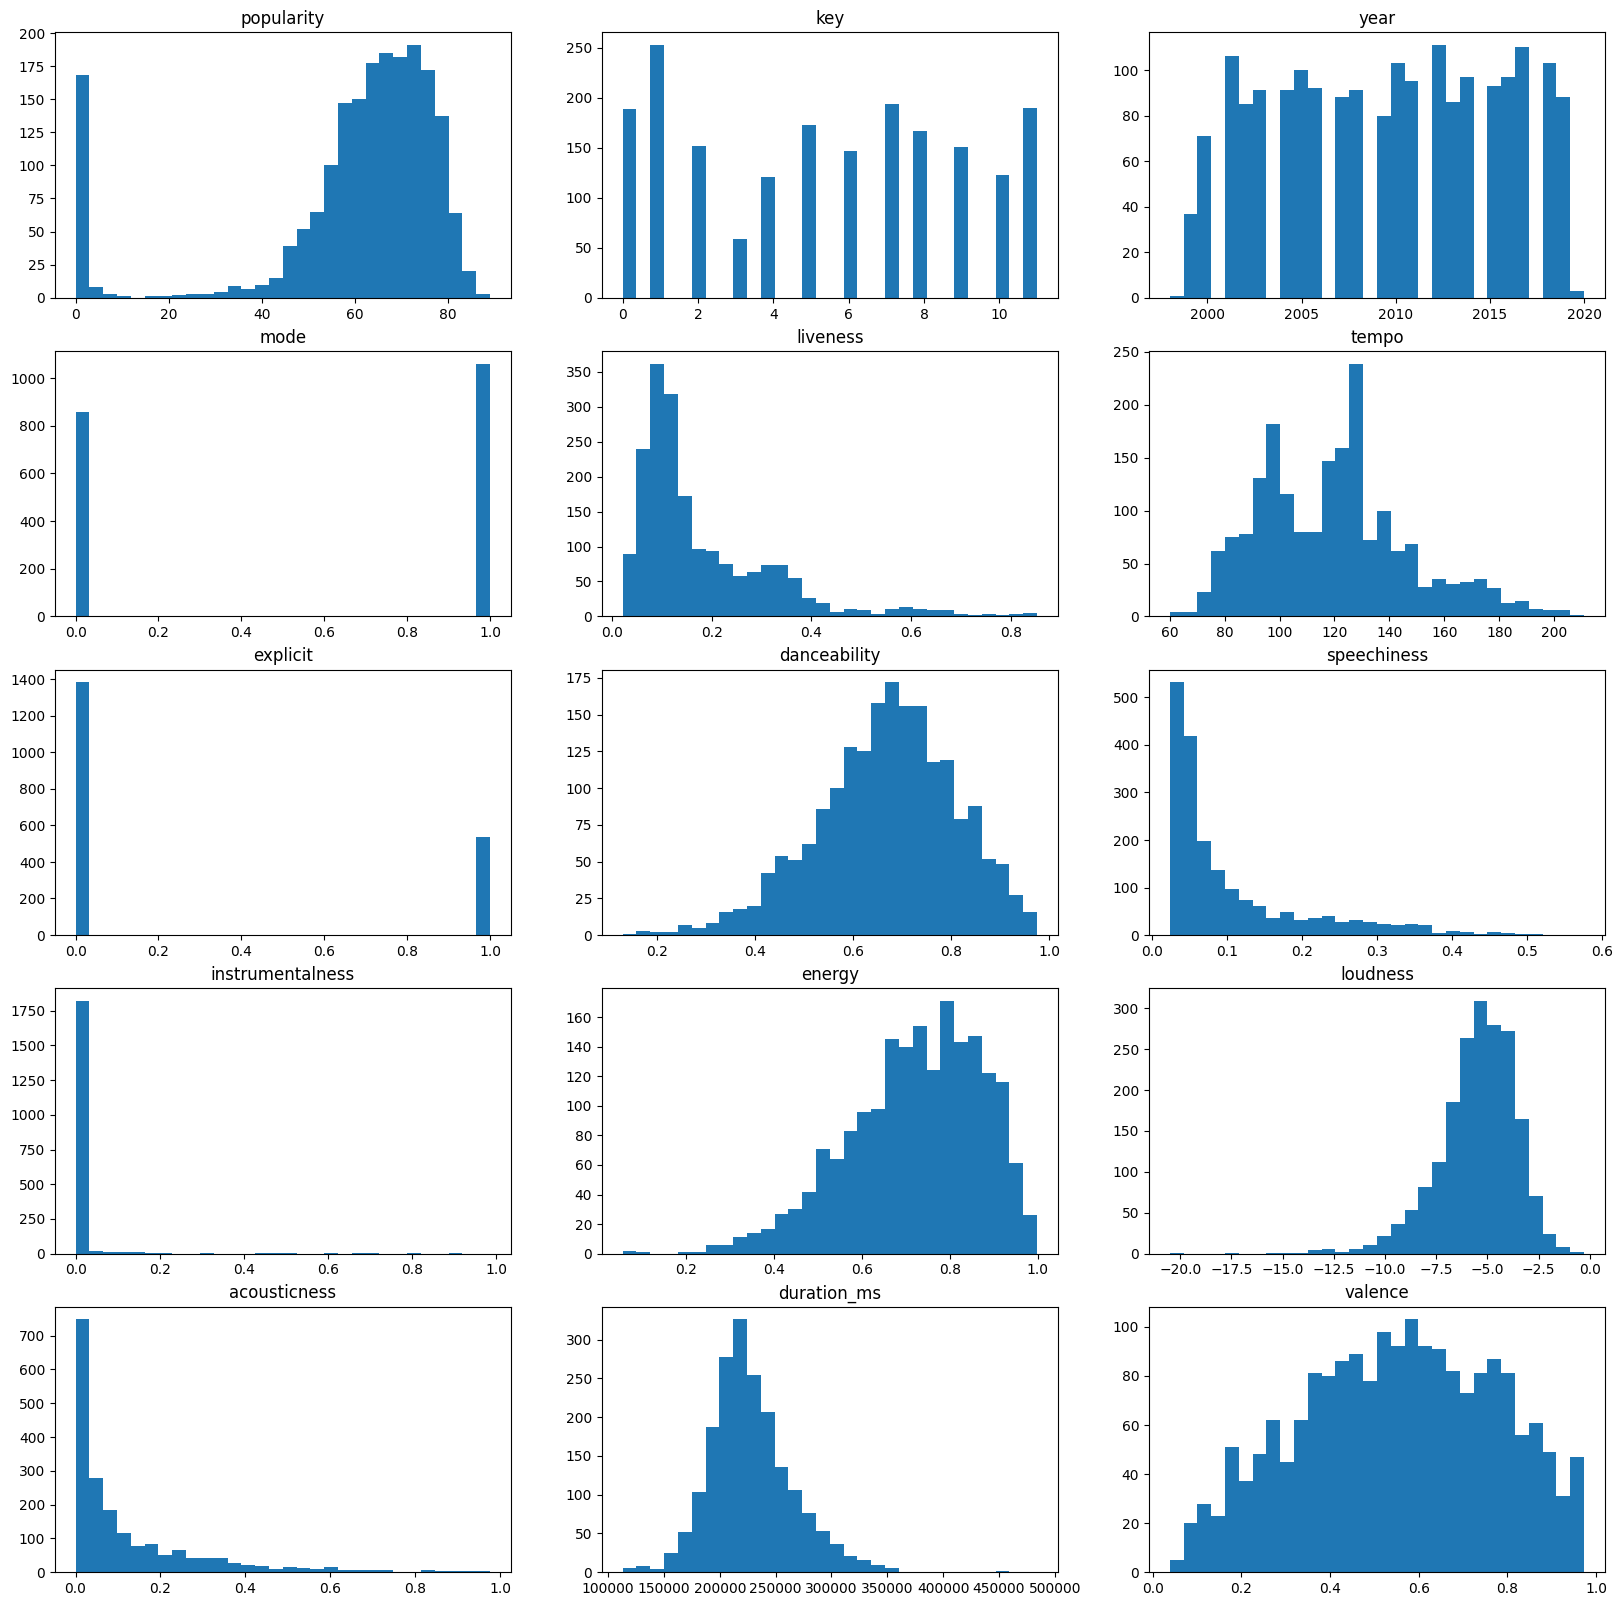

In [74]:
fig, ax = plt.subplots(nrows=5, ncols=3, figsize=(20, 20))
i = 0
j = 0
for col in cols:
    if j == 3:
        i += 1
        j = 0
    ax[i, j].set(title=col)
    ax[i, j].hist(df[col], 30)
    j += 1

## Split genre column

In [76]:
main_df = df
unnormalized_df = df.copy()

In [77]:
genre_col = main_df[main_df.columns[-1:]]
genre_col

,genre
0,pop
1,"rock, pop"
2,"pop, country"
3,"rock, metal"
4,pop
...,...
1914,pop
1915,pop
1916,"hip hop, country"
1917,pop


## Scaling and normalization

### Remove nominal features

In [78]:
numeric_features_df = df.drop(nominal_features, axis=1)

### Apply Z-score scaler

In [79]:
scaler = preprocessing.StandardScaler()
scaled = scaler.fit_transform(numeric_features_df)

In [80]:
pd.DataFrame(scaled, columns=cols).describe()

,popularity,key,year,mode,liveness,tempo,explicit,danceability,speechiness,instrumentalness,energy,loudness,acousticness,duration_ms,valence
count,1.919000e+03,1.919000e+03,1.919000e+03,1.919000e+03,1.919000e+03,1.919000e+03,1.919000e+03,1.919000e+03,1.919000e+03,1.919000e+03,1.919000e+03,1.919000e+03,1.919000e+03,1.919000e+03,1.919000e+03
mean,-1.332962e-16,7.405344e-18,5.924275e-15,-1.175598e-16,-2.962138e-16,3.924832e-16,1.101545e-16,3.536052e-16,4.072939e-17,9.626947e-17,-1.166342e-16,-2.591870e-17,-1.221882e-16,1.481069e-17,1.925389e-16
std,1.000261e+00,1.000261e+00,1.000261e+00,1.000261e+00,1.000261e+00,1.000261e+00,1.000261e+00,1.000261e+00,1.000261e+00,1.000261e+00,1.000261e+00,1.000261e+00,1.000261e+00,1.000261e+00,1.000261e+00
min,-2.954725e+00,-6.217401e-01,-1.959838e+00,-2.766112e+00,-3.823832e+00,-4.360986e+00,-1.493527e+00,-7.724933e+00,-1.112024e+00,-8.403374e-01,-7.419685e-01,-1.730052e-01,-1.136227e+00,-2.326951e+00,-2.228860e+00
25%,-6.432502e-01,-6.217401e-01,-9.394179e-01,-1.696141e-01,-6.112321e-01,-6.370152e-01,-9.390525e-01,-4.993744e-01,-1.112024e+00,-6.671442e-01,-6.635470e-01,-1.730052e-01,-6.610815e-01,-7.394097e-01,-7.847088e-01
50%,-1.406014e-01,-6.217401e-01,8.100263e-02,2.476801e-01,6.398251e-02,1.089568e-01,1.698963e-01,1.169142e-01,8.992614e-01,-4.462450e-01,-4.198033e-01,-1.730052e-01,-4.033276e-01,2.853603e-02,-5.067576e-03
75%,4.944416e-01,1.608389e+00,9.313530e-01,6.186083e-01,6.894445e-01,7.764055e-01,7.243706e-01,6.909842e-01,8.992614e-01,2.672697e-01,2.759423e-01,-1.722434e-01,4.251673e-01,8.078084e-01,5.252804e-01
max,6.518493e+00,1.608389e+00,1.781703e+00,1.360465e+00,2.189132e+00,1.816840e+00,1.556082e+00,2.694823e+00,8.992614e-01,4.892670e+00,4.935576e+00,1.108577e+01,4.751752e+00,1.908757e+00,3.361178e+00


### Apply min-max normalizer

In [81]:
scaler = preprocessing.MinMaxScaler()
normalized = scaler.fit_transform(scaled)
df = pd.DataFrame(normalized, columns=[cols])
df

,popularity,key,year,mode,liveness,tempo,explicit,danceability,speechiness,instrumentalness,energy,loudness,acousticness,duration_ms,valence
0,0.264478,0.0,0.090909,0.865169,0.735225,0.825230,0.090909,0.744639,0.0,0.037084,0.307363,0.000018,0.401082,0.915499,0.232272
1,0.145673,0.0,0.045455,0.887640,0.360520,0.891961,0.000000,0.770630,1.0,0.046310,0.010534,0.000000,0.710162,0.690876,0.588118
2,0.370598,0.0,0.045455,0.741573,0.472813,0.467217,0.636364,0.568584,1.0,0.010492,0.177238,0.000000,0.276007,0.256605,0.509441
3,0.300402,0.0,0.090909,0.876404,0.498818,0.908908,0.000000,0.812877,0.0,0.042330,0.026928,0.000014,0.391461,0.541127,0.397615
4,0.235918,0.0,0.090909,0.730337,0.573286,0.924796,0.727273,0.776164,0.0,0.051375,0.041784,0.001056,0.075767,0.899454,0.746771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1914,0.183286,0.0,0.954545,0.887640,0.842790,0.719309,0.090909,0.763366,0.0,0.064399,0.043731,0.000000,0.101624,0.977538,0.516727
1915,0.176281,0.0,0.954545,0.876404,0.500000,0.685415,0.818182,0.731643,1.0,0.242041,0.119860,0.000021,0.100421,0.562520,0.729122
1916,0.236007,0.0,0.954545,0.775281,0.848700,0.659994,0.818182,0.586965,1.0,0.155210,0.068527,0.000000,0.303668,0.826719,0.251704
1917,0.156351,0.0,0.954545,0.842697,0.723404,0.492638,0.727273,0.642405,1.0,0.076700,0.461055,0.000002,0.241130,0.330410,0.284946


In [82]:
df.describe()

,popularity,key,year,mode,liveness,tempo,explicit,danceability,speechiness,instrumentalness,energy,loudness,acousticness,duration_ms,valence
count,1919.000000,1919.000000,1919.000000,1919.000000,1919.000000,1919.000000,1919.000000,1919.000000,1919.000000,1919.000000,1919.000000,1919.000000,1919.000000,1919.000000,1919.000000
mean,0.311903,0.278791,0.523805,0.670316,0.635931,0.705909,0.489744,0.741374,0.552892,0.146579,0.130685,0.015366,0.192974,0.549365,0.398720
std,0.105588,0.448521,0.267339,0.242395,0.166351,0.161911,0.327996,0.095997,0.497324,0.174474,0.176178,0.088843,0.169882,0.236150,0.178936
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.244001,0.000000,0.272727,0.629213,0.534279,0.602796,0.181818,0.693448,0.000000,0.030210,0.013813,0.000000,0.080698,0.374799,0.258344
50%,0.297061,0.000000,0.545455,0.730337,0.646572,0.723546,0.545455,0.752594,1.000000,0.068741,0.056744,0.000000,0.124474,0.556102,0.397813
75%,0.364097,1.000000,0.772727,0.820225,0.750591,0.831586,0.727273,0.807689,1.000000,0.193198,0.179287,0.000068,0.265183,0.740079,0.492687
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [83]:
df.shape

(1919, 15)

## Outlier Detection

### Boxplot method

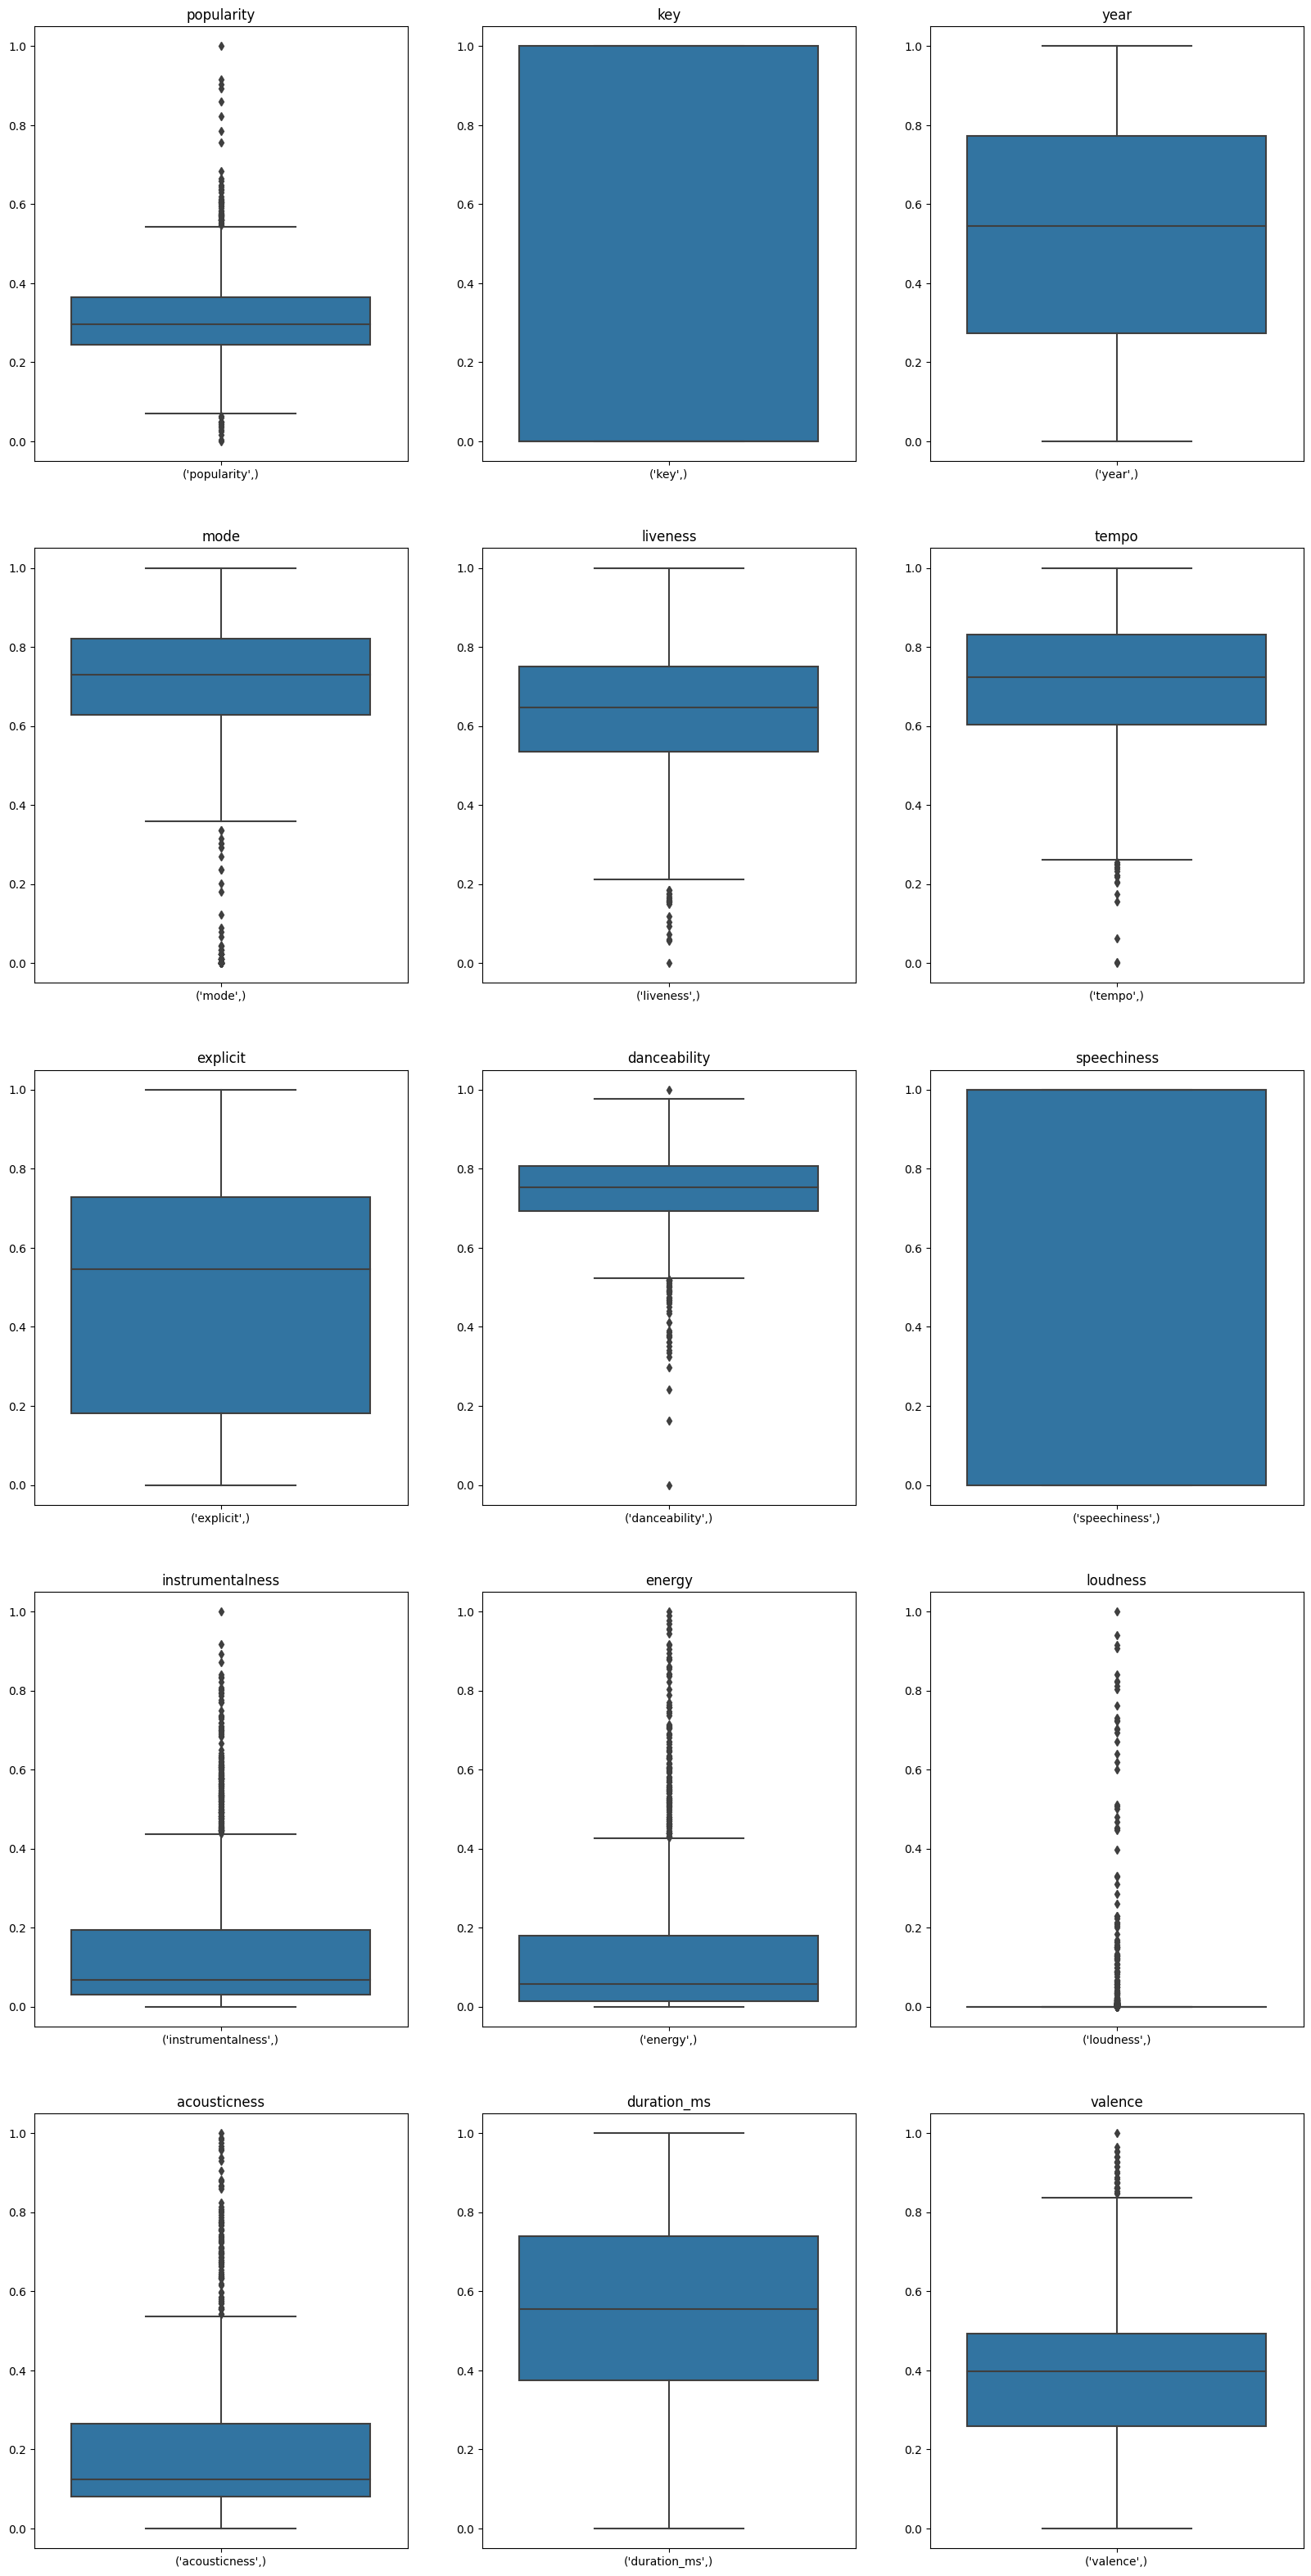

In [84]:
fig, ax = plt.subplots(nrows=5, ncols=3, figsize=(20, 40))
i = 0
j = 0
for col in cols:
    if j == 3:
        i += 1
        j = 0
    ax[i, j].set(title=col)
    sns.boxplot(df[col], ax=ax[i,j])
    j += 1

## Isolation forrest (IForrest) method

In [85]:
# identify outliers in the training dataset
iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(df[cols])

# select all rows that are not outliers
mask = yhat != -1
count = 0
for i in yhat:
    if i != 1:
        count = count + 1
df = df[mask]
df = df.reset_index()
df = df.drop('index', axis=1)
mask = yhat != -1
unnormalized_df = unnormalized_df[mask]
unnormalized_df = unnormalized_df.reset_index()
unnormalized_df = unnormalized_df.drop('index', axis=1)
unnormalized_df

/tmp/ipykernel_7161/2359128517.py:13: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop('index', axis=1)


,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,0,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,0,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,0,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,0,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,0,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1722,Jonas Brothers,Sucker,181026,0,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop
1723,Taylor Swift,Cruel Summer,178426,0,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop
1724,Blanco Brown,The Git Up,200593,0,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984,"hip hop, country"
1725,Sam Smith,Dancing With A Stranger (with Normani),171029,0,2019,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998,pop


## Append genre column to cleaned dataset

In [87]:
df_with_genre = df
genre_col = genre_col[mask]
genre_col = genre_col.reset_index()
genre_col = genre_col.drop('index', axis=1)
df_with_genre['genre'] = genre_col
df_with_genre.columns = cols_with_genre
df_with_genre

,popularity,key,year,mode,liveness,tempo,explicit,danceability,speechiness,instrumentalness,energy,loudness,acousticness,duration_ms,valence,genre
0,0.264478,0.0,0.090909,0.865169,0.735225,0.825230,0.090909,0.744639,0.0,0.037084,0.307363,0.000018,0.401082,0.915499,0.232272,pop
1,0.145673,0.0,0.045455,0.887640,0.360520,0.891961,0.000000,0.770630,1.0,0.046310,0.010534,0.000000,0.710162,0.690876,0.588118,"rock, pop"
2,0.370598,0.0,0.045455,0.741573,0.472813,0.467217,0.636364,0.568584,1.0,0.010492,0.177238,0.000000,0.276007,0.256605,0.509441,"pop, country"
3,0.300402,0.0,0.090909,0.876404,0.498818,0.908908,0.000000,0.812877,0.0,0.042330,0.026928,0.000014,0.391461,0.541127,0.397615,"rock, metal"
4,0.235918,0.0,0.090909,0.730337,0.573286,0.924796,0.727273,0.776164,0.0,0.051375,0.041784,0.001056,0.075767,0.899454,0.746771,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1722,0.183286,0.0,0.954545,0.887640,0.842790,0.719309,0.090909,0.763366,0.0,0.064399,0.043731,0.000000,0.101624,0.977538,0.516727,pop
1723,0.176281,0.0,0.954545,0.876404,0.500000,0.685415,0.818182,0.731643,1.0,0.242041,0.119860,0.000021,0.100421,0.562520,0.729122,pop
1724,0.236007,0.0,0.954545,0.775281,0.848700,0.659994,0.818182,0.586965,1.0,0.155210,0.068527,0.000000,0.303668,0.826719,0.251704,"hip hop, country"
1725,0.156351,0.0,0.954545,0.842697,0.723404,0.492638,0.727273,0.642405,1.0,0.076700,0.461055,0.000002,0.241130,0.330410,0.284946,pop


## Save the preprocessed dataset

In [88]:
df.to_csv('../Dataset/songs_normalize_preprocessed.csv')

## Histogram after normalization

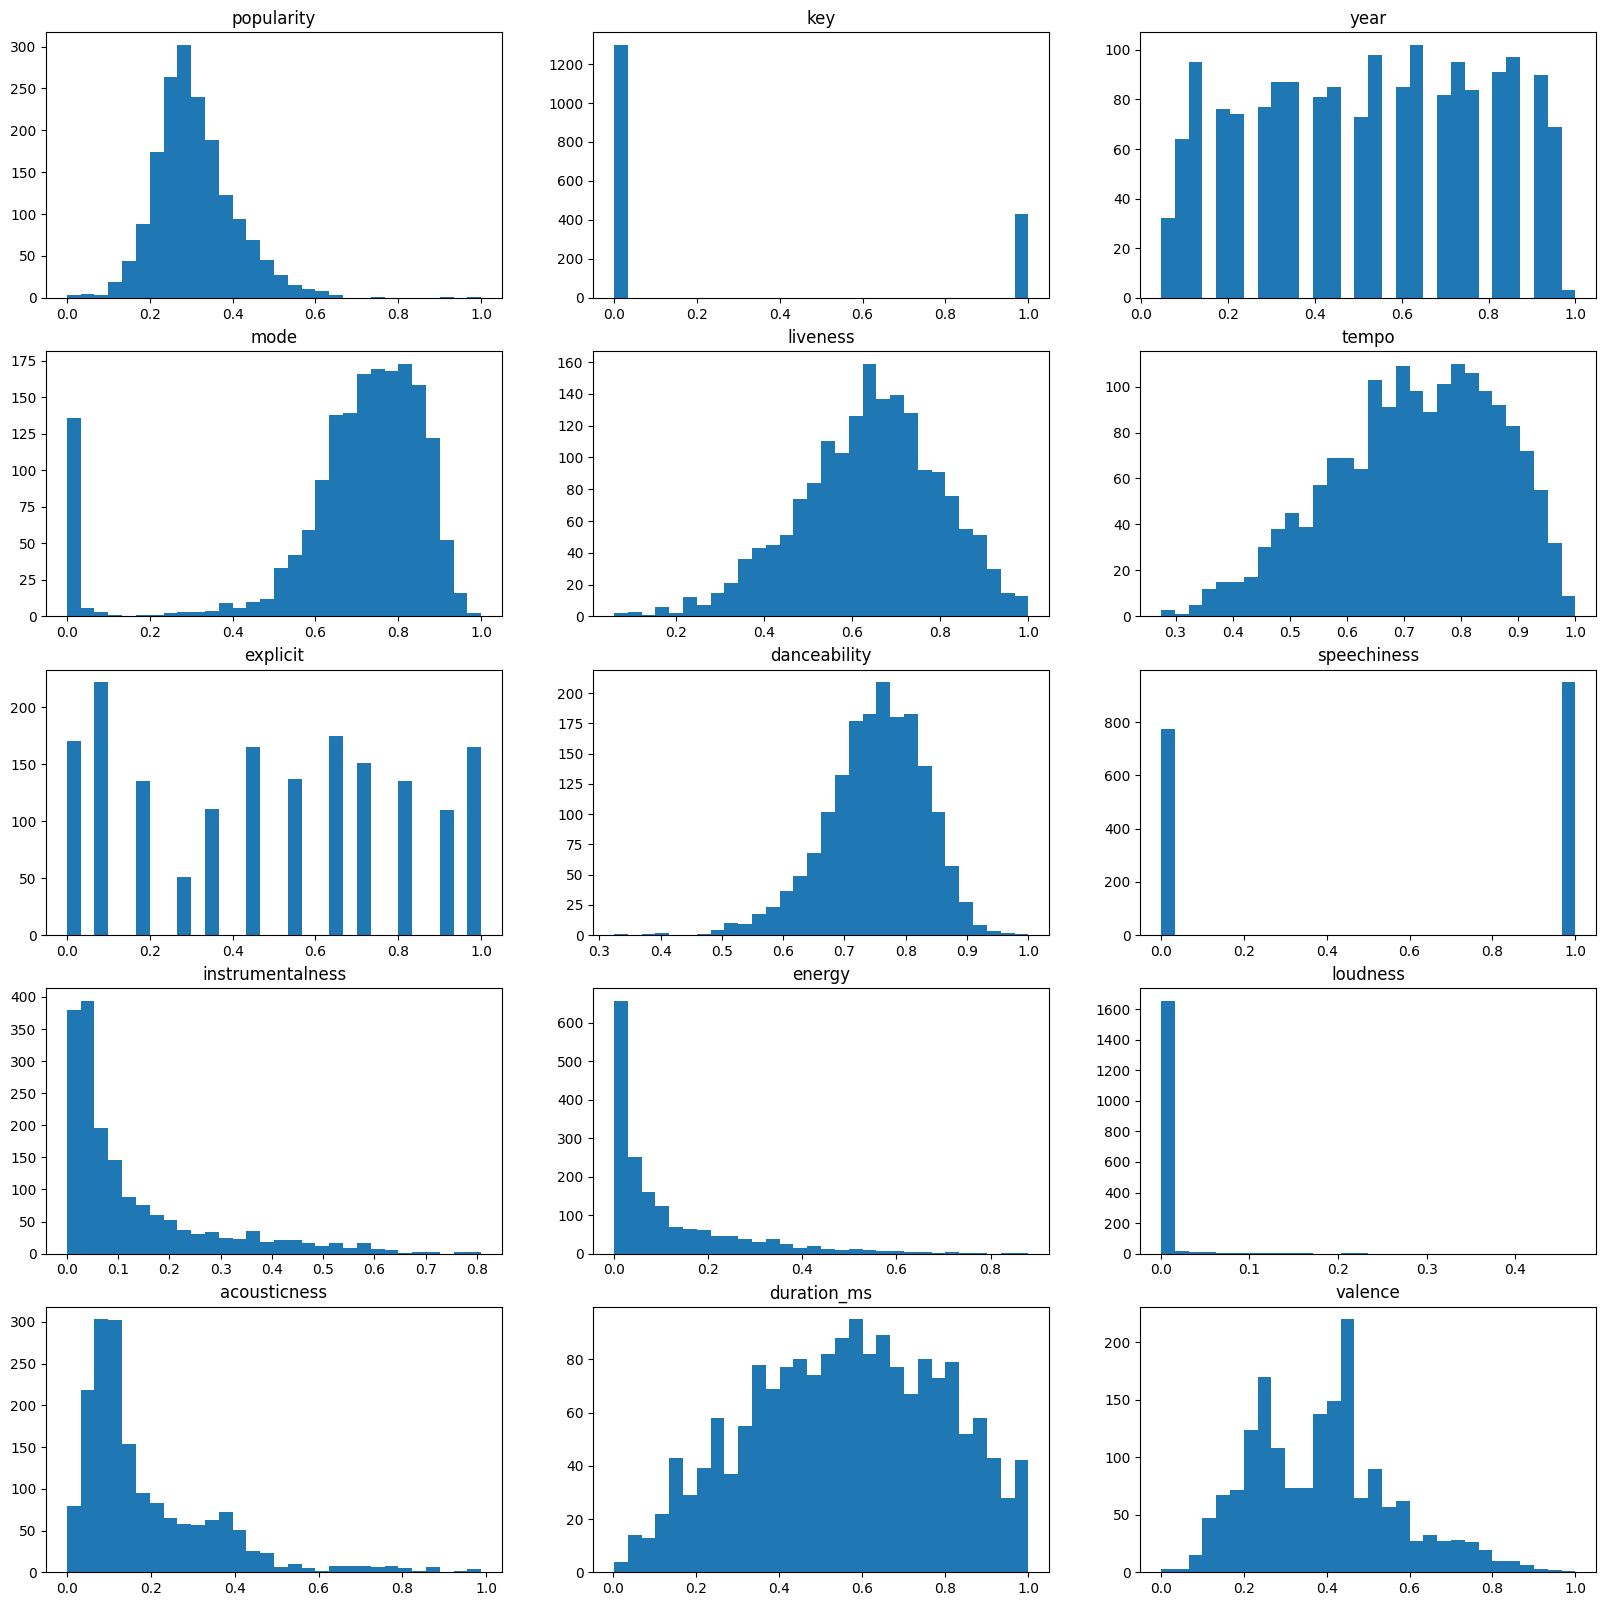

In [89]:
fig, ax = plt.subplots(nrows=5, ncols=3, figsize=(20, 20))
i = 0
j = 0
for col in cols:
    if j == 3:
        i += 1
        j = 0
    ax[i, j].set(title=col)
    ax[i, j].hist(df[col], 30)
    j += 1

# Exploring and analyzing the data

## Most popular songs by year

In [90]:
most_popular = main_df.query('popularity>=80', inplace=False).sort_values('popularity', ascending=False)
most_popular[:10]

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
1265,The Neighbourhood,Sweater Weather,240400,0,2013,89,0.612,0.807,10,-2.810,1,0.0336,0.04950,0.017700,0.1010,0.398,124.053,"rock, pop"
1255,Tom Odell,Another Love,244360,1,2013,88,0.445,0.537,4,-8.532,0,0.0400,0.69500,0.000017,0.0944,0.131,122.769,pop
197,Eminem,Without Me,290320,1,2002,87,0.908,0.669,7,-2.827,1,0.0738,0.00286,0.000000,0.2370,0.662,112.238,hip hop
6,Eminem,The Real Slim Shady,284200,1,2000,86,0.949,0.661,5,-4.244,0,0.0572,0.03020,0.000000,0.0454,0.760,104.504,hip hop
1744,Billie Eilish,lovely (with Khalid),200185,0,2018,86,0.351,0.296,4,-10.109,0,0.0333,0.93400,0.000000,0.0950,0.120,115.284,"pop, Dance/Electronic"
1544,WILLOW,Wait a Minute!,196520,0,2015,86,0.764,0.705,3,-5.279,0,0.0278,0.03710,0.000019,0.0943,0.672,101.003,"pop, R&B, Dance/Electronic"
1174,Bruno Mars,Locked out of Heaven,233478,0,2012,85,0.726,0.698,5,-4.165,1,0.0431,0.04900,0.000000,0.3090,0.867,143.994,pop
1636,Ed Sheeran,Perfect,263400,0,2017,85,0.599,0.448,8,-6.312,1,0.0232,0.16300,0.000000,0.1060,0.168,95.050,pop
1450,Avicii,The Nights,176658,0,2014,85,0.527,0.835,6,-5.298,1,0.0433,0.01660,0.000000,0.2490,0.654,125.983,"pop, Dance/Electronic"
1448,The Neighbourhood,Daddy Issues,260173,0,2015,85,0.588,0.521,10,-9.461,1,0.0329,0.06780,0.149000,0.1230,0.337,85.012,"rock, pop"


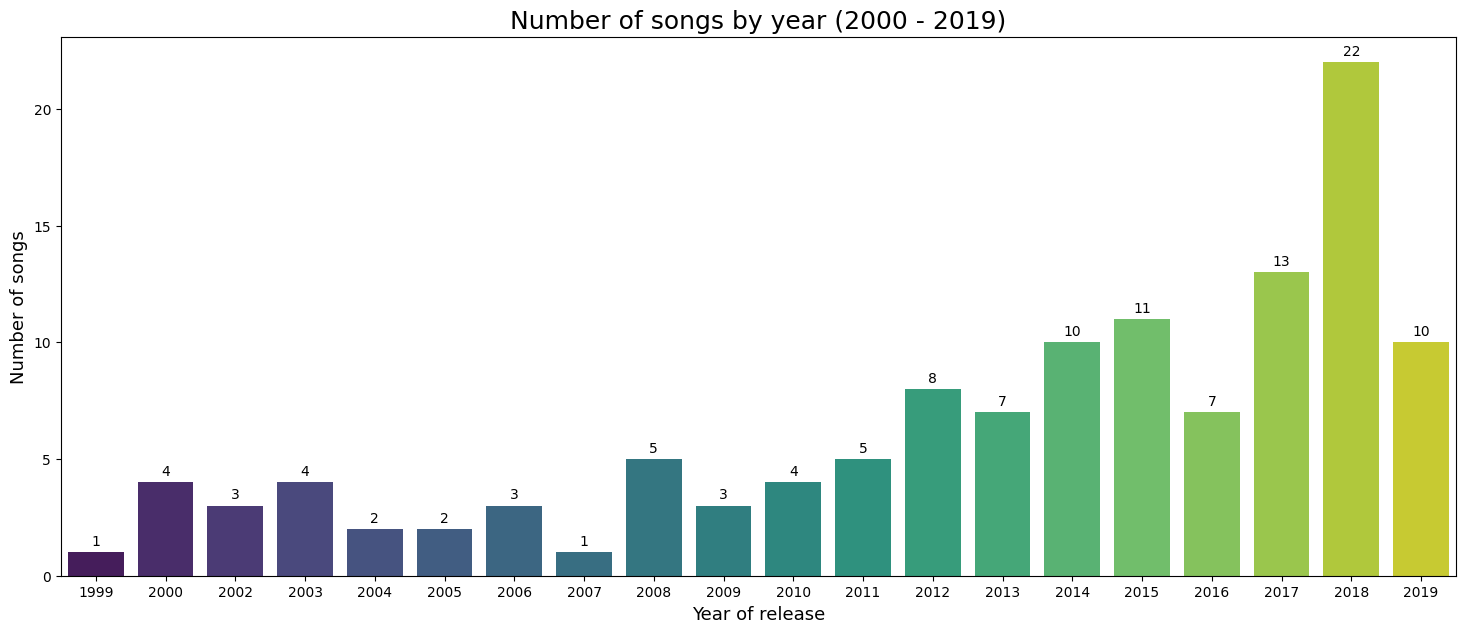

In [91]:
songs_by_year =most_popular.groupby("year").size().to_frame(name = 'songs').reset_index()

plt.figure(figsize = (18,7))
plots = sns.barplot(x = 'year', y = 'songs', data = songs_by_year, palette = 'viridis')

for bar in plots.patches:

    plots.annotate(format(bar.get_height(), '.0f'),
               (bar.get_x() + bar.get_width() / 2,
                bar.get_height()), ha='center', va='center',
               size=10, xytext=(0, 8),
               textcoords='offset points')

plt.xlabel('Year of release', size = 13)
plt.ylabel('Number of songs', size = 13)
plt.title('Number of songs by year (2000 - 2019)', size = 18)
plt.show()

## Heatmap

/tmp/ipykernel_7161/959132967.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(unnormalized_df.corr(), annot = True, linewidths = .5, fmt = '.2f', cmap = "viridis")


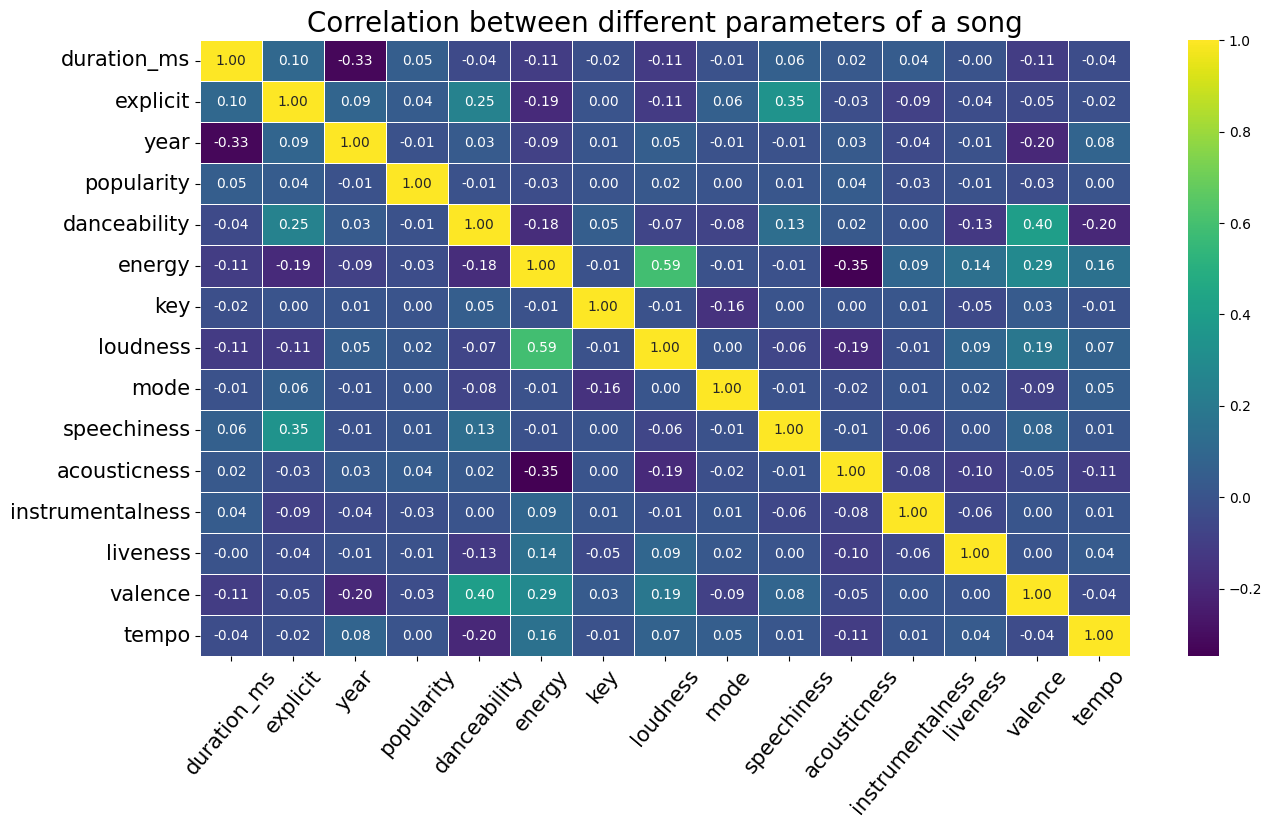

In [92]:
plt.figure(figsize=(15,8))
sns.heatmap(unnormalized_df.corr(), annot = True, linewidths = .5, fmt = '.2f', cmap = "viridis")
plt.title('Correlation between different parameters of a song', size = 20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15, rotation = 50)
plt.show()

## Popular artists

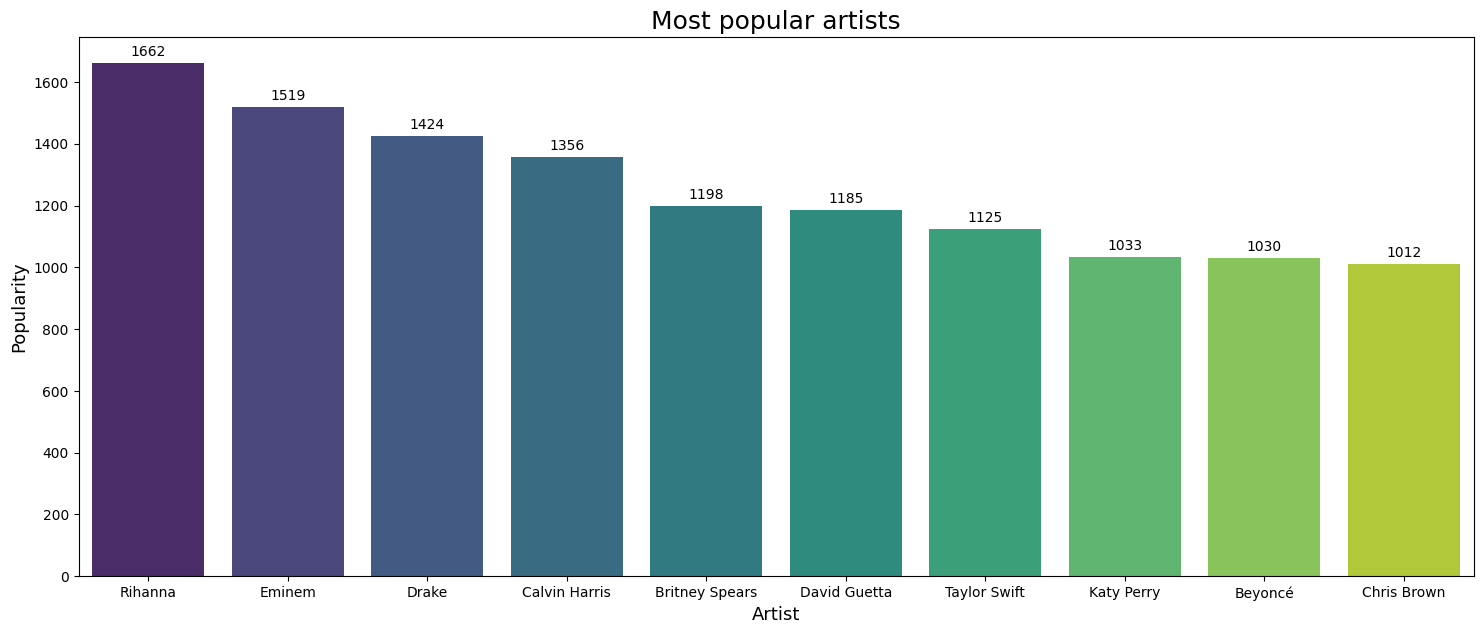

In [93]:
popularity_by_artist = main_df.groupby('artist', as_index = False)['popularity'] \
                                .sum().sort_values(['popularity'],ascending=False)

popularity_by_artist['popularity'] = popularity_by_artist['popularity'].astype('Int64')

popularity_by_artist = popularity_by_artist.head(10)

plt.figure(figsize = (18,7))
plots = sns.barplot(x = 'artist', y = 'popularity', data = popularity_by_artist, palette = 'viridis')

for bar in plots.patches:

    plots.annotate(format(bar.get_height(), '.0f'),
               (bar.get_x() + bar.get_width() / 2,
                bar.get_height()), ha='center', va='center',
               size=10, xytext=(0, 8),
               textcoords='offset points')

plt.xlabel('Artist', size = 13)
plt.ylabel('Popularity', size = 13)
plt.title('Most popular artists', size = 18)
plt.show()

# Use one-hot encoding to create new columns for each genre

## Assign genres to dataframe

In [94]:
genre_feature = []
genres = df_with_genre["genre"].str.strip()
for genre in genres:
    genre_feature.append(",".join(['genre.' + g.strip() for g in genre.split(',')]))
    
df_with_genre['genre'] = genre_feature

genres = df_with_genre['genre'].str.get_dummies(sep=",")
df_with_genre = pd.concat([df_with_genre, genres], axis=1)
df_with_genre

,popularity,key,year,mode,liveness,tempo,explicit,danceability,speechiness,instrumentalness,...,genre.World/Traditional,genre.blues,genre.classical,genre.country,genre.easy listening,genre.hip hop,genre.latin,genre.metal,genre.pop,genre.rock
0,0.264478,0.0,0.090909,0.865169,0.735225,0.825230,0.090909,0.744639,0.0,0.037084,...,0,0,0,0,0,0,0,0,1,0
1,0.145673,0.0,0.045455,0.887640,0.360520,0.891961,0.000000,0.770630,1.0,0.046310,...,0,0,0,0,0,0,0,0,1,1
2,0.370598,0.0,0.045455,0.741573,0.472813,0.467217,0.636364,0.568584,1.0,0.010492,...,0,0,0,1,0,0,0,0,1,0
3,0.300402,0.0,0.090909,0.876404,0.498818,0.908908,0.000000,0.812877,0.0,0.042330,...,0,0,0,0,0,0,0,1,0,1
4,0.235918,0.0,0.090909,0.730337,0.573286,0.924796,0.727273,0.776164,0.0,0.051375,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1722,0.183286,0.0,0.954545,0.887640,0.842790,0.719309,0.090909,0.763366,0.0,0.064399,...,0,0,0,0,0,0,0,0,1,0
1723,0.176281,0.0,0.954545,0.876404,0.500000,0.685415,0.818182,0.731643,1.0,0.242041,...,0,0,0,0,0,0,0,0,1,0
1724,0.236007,0.0,0.954545,0.775281,0.848700,0.659994,0.818182,0.586965,1.0,0.155210,...,0,0,0,1,0,1,0,0,0,0
1725,0.156351,0.0,0.954545,0.842697,0.723404,0.492638,0.727273,0.642405,1.0,0.076700,...,0,0,0,0,0,0,0,0,1,0


## Save the normalized dataset with genre column

In [95]:
df_with_genre.to_csv('../Dataset/songs_preprocessed_with_genre.csv')

## Popular genres

In [96]:
genres_dic = {}
for row in df_with_genre.index:
    for col in df_with_genre.columns:
        if 'genre' in col and col != 'genre':
            if df_with_genre.at[row, col] == 1:
                genre_name = col.replace('genre.', '')
                genres_dic[genre_name] = genres_dic.get(genre_name, 0) + 1

genre_dic_df = {'Genres':[], 'Songs':[]}
for key, value in genres_dic.items():
    genre_dic_df['Genres'].append(key)
    genre_dic_df['Songs'].append(value)

genre_df = pd.DataFrame(genre_dic_df).sort_values(['Songs'],ascending=False)
genre_df

,Genres,Songs
0,pop,1452
5,hip hop,653
4,R&B,401
6,Dance/Electronic,348
1,rock,209
3,metal,62
9,latin,60
2,country,19
7,Folk/Acoustic,17
11,World/Traditional,6


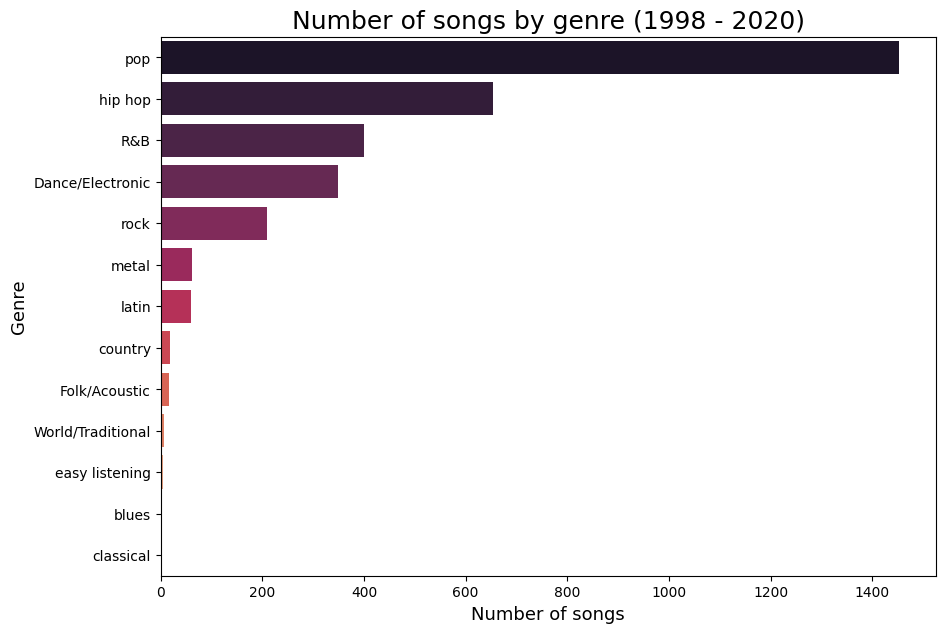

In [97]:
plt.figure(figsize = (10,7))
plots = sns.barplot(x = 'Songs', y = 'Genres', data = genre_df, palette = 'rocket')  
plt.xlabel('Number of songs', size = 13)
plt.ylabel('Genre', size = 13)
plt.title('Number of songs by genre (1998 - 2020)', size = 18)
plt.show()

## Dataset heatmap with genre columns

### Heatmap

/tmp/ipykernel_7161/1369272592.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_with_genre.corr(), annot = True, linewidths = .5, fmt = '.1f', cmap = "viridis")


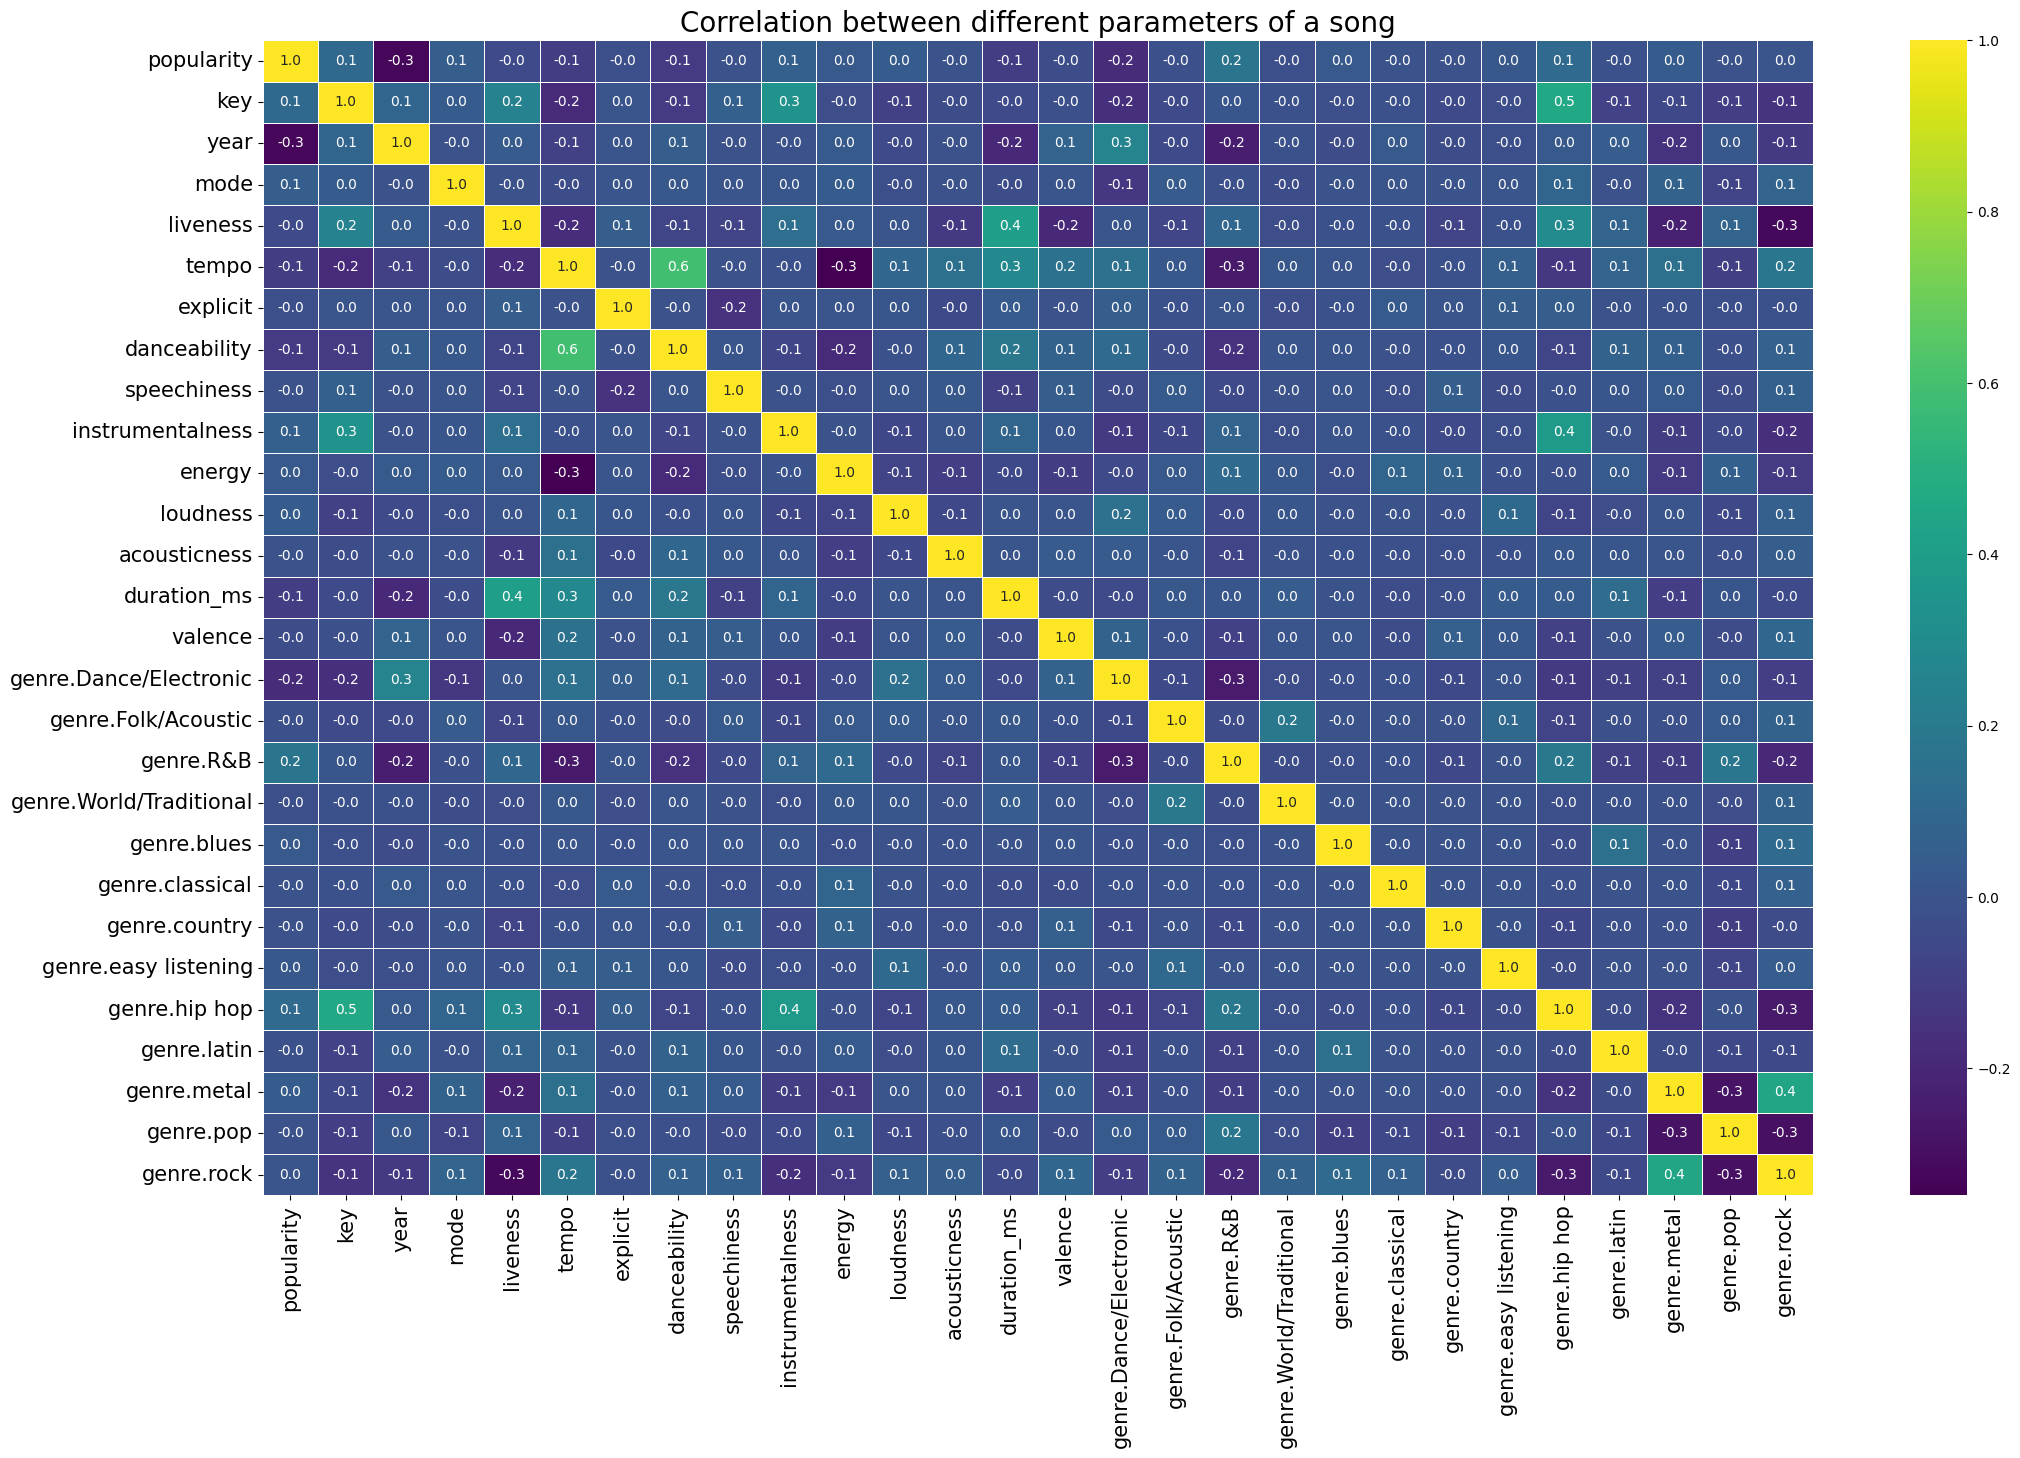

In [98]:
plt.figure(figsize=(25,15))
sns.heatmap(df_with_genre.corr(), annot = True, linewidths = .5, fmt = '.1f', cmap = "viridis")
plt.title('Correlation between different parameters of a song', size = 20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()